In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
data=pd.read_csv('../input/nifty50-stock-market-data/WIPRO.csv')
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355942e+11,NaN,NaN,NaN
1,2000-01-04,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292192e+12,NaN,NaN,NaN
2,2000-01-05,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,2000-01-06,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157822e+13,NaN,NaN,NaN
4,2000-01-07,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


In [4]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,WIPRO,EQ,475.70,479.40,483.85,477.00,482.00,480.30,479.77,9314644,4.468927e+14,89443.0,3081057.0,0.3308
5302,2021-04-27,WIPRO,EQ,480.30,481.40,487.00,481.00,483.85,485.05,484.07,7209467,3.489910e+14,112831.0,2548269.0,0.3535
5303,2021-04-28,WIPRO,EQ,485.05,485.85,493.20,481.25,488.65,489.30,487.55,9615534,4.688083e+14,123736.0,3254249.0,0.3384
5304,2021-04-29,WIPRO,EQ,489.30,492.70,492.80,485.70,489.00,489.85,489.45,7641133,3.739989e+14,82446.0,2534352.0,0.3317
5305,2021-04-30,WIPRO,EQ,489.85,491.50,511.80,489.30,492.50,492.75,501.42,29115571,1.459925e+15,252478.0,5182914.0,0.1780


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [6]:
data.shape

(5306, 15)

In [7]:
df1=data.reset_index()['Close']
df1

0       2724.20
1       2942.15
2       2990.10
3       2932.25
4       2697.70
         ...   
5301     480.30
5302     485.05
5303     489.30
5304     489.85
5305     492.75
Name: Close, Length: 5306, dtype: float64

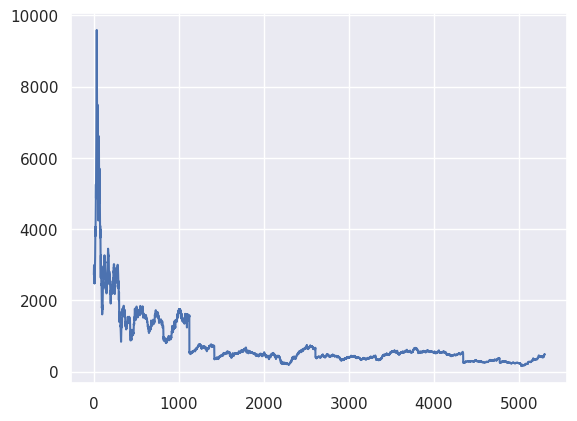

In [8]:
plt.plot(df1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1.shape

(5306, 1)

In [11]:
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data,test_data = df1[0:train_size,:], df1[train_size:len(df1),:]

In [12]:
train_size

3448

In [13]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape,y_train.shape)

(3347, 100) (3347,)


In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import tensorflow as tf

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mae', optimizer='adam')

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - loss: 0.0241 - val_loss: 0.0031
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - loss: 0.0070 - val_loss: 0.0014
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 0.0058 - val_loss: 0.0022
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - loss: 0.0058 - val_loss: 0.0026
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - loss: 0.0046 - val_loss: 0.0010
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - loss: 0.0042 - val_loss: 0.0025
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 

In [20]:
# prediction 
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [21]:
# # Calculate MSE for Train Data
# import math
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_train,train_predict)

In [22]:
# Test Data MSE
# mean_squared_error(y_test,test_predict)
# Compute the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
dl_r2 = r2_score(y_true=y_test, y_pred=test_predict)
dl_mae = mean_absolute_error(y_true=y_test, y_pred=test_predict)
dl_mse = mean_squared_error(y_true=y_test, y_pred=test_predict)

# Print all three metrics
print(f'Mean Squared Error (MSE): {dl_mse}')
print(f'Mean Absolute Error (MAE): {dl_mae}')
print(f'R^2 Score: {dl_r2}')

Mean Squared Error (MSE): 188515.99683644332
Mean Absolute Error (MAE): 413.4784485031398
R^2 Score: -918718926.9775398


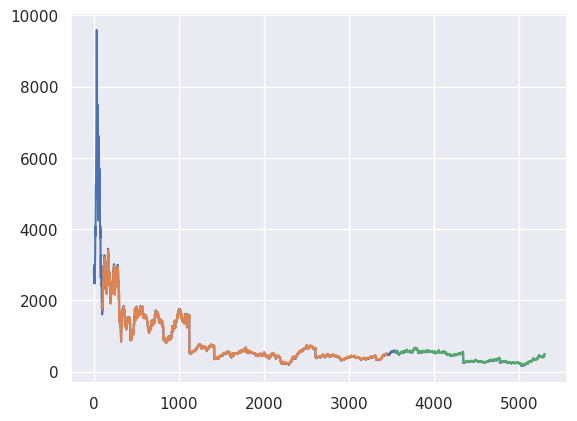

In [23]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
len(test_data)

1858

In [25]:
x_input=test_data[1758:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

[0.03551598]
101
1 day input [0.02105548 0.02080615 0.02136317 0.02091755 0.02053559 0.02028095
 0.01984064 0.02019607 0.02080084 0.02064169 0.02134725 0.0203287
 0.02141622 0.02368145 0.02332601 0.02340028 0.02362309 0.02355943
 0.02375572 0.023952   0.02483263 0.02588301 0.02589362 0.02593076
 0.0284188  0.03018005 0.03133654 0.03147447 0.0309811  0.02930473
 0.02856203 0.0284241  0.02998377 0.03007395 0.02996255 0.0291668
 0.03014292 0.02859917 0.02711377 0.02749573 0.02822251 0.02876893
 0.02838697 0.02792543 0.0289599  0.02938961 0.02935247 0.02914027
 0.02967077 0.02942674 0.02919863 0.0284188  0.02871057 0.02839227
 0.02719865 0.02685913 0.02766549 0.02747451 0.02630741 0.02674242
 0.02844002 0.02898112 0.02933125 0.02742676 0.02700767 0.0272517
 0.02804745 0.0278883  0.02801031 0.02832331 0.02729945 0.0262915
 0.02632863 0.02674773 0.02685913 0.02638168 0.02517745 0.02562838
 0.02713499 0.0267159  0.02695462 0.02791482 0.02809519 0.02924637
 0.02968138 0.03053018 0.02867344 0.0

In [28]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [29]:
len(df1)

5306

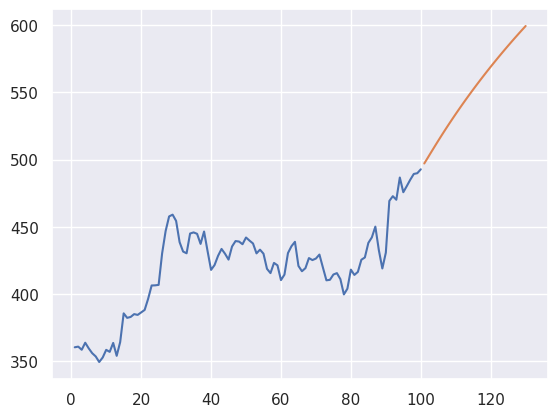

In [30]:
plt.plot(day_new,scaler.inverse_transform(df1[5206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

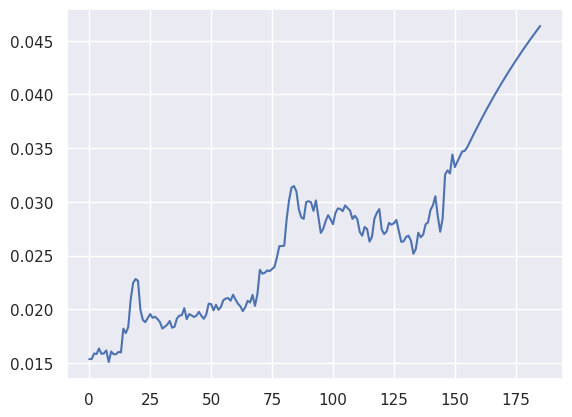

In [31]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5150:])

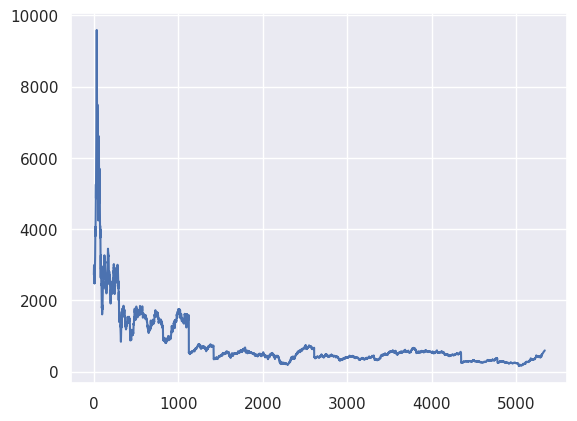

In [32]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)